In [146]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import os

In [147]:
for dirpath, dirnames, filenames in os.walk('../../../Dataset/pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}"')

There are 2 directories and 1 images in "../../../Dataset/pizza_steak"
There are 2 directories and 1 images in "../../../Dataset/pizza_steak/test"
There are 0 directories and 250 images in "../../../Dataset/pizza_steak/test/steak"
There are 0 directories and 250 images in "../../../Dataset/pizza_steak/test/pizza"
There are 2 directories and 1 images in "../../../Dataset/pizza_steak/train"
There are 0 directories and 750 images in "../../../Dataset/pizza_steak/train/steak"
There are 0 directories and 750 images in "../../../Dataset/pizza_steak/train/pizza"


In [148]:
num_steak_images_train = len(os.listdir('../../../Dataset/pizza_steak/train/steak'))
num_steak_images_train

750

In [149]:
import pathlib
import numpy as np
data_dir = pathlib.Path('../../../Dataset/pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['.DS_Store' 'pizza' 'steak']


In [150]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

['262321.jpg']
Image shape: (384, 512, 3)


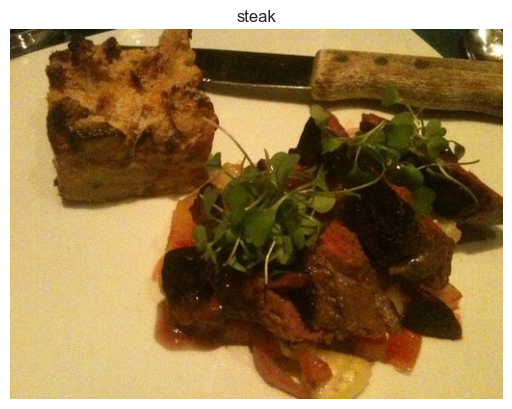

In [151]:
img = view_random_image(target_dir="../../../Dataset/pizza_steak/train/",
                        target_class="steak")

In [152]:
img

array([[[ 41,  22,  16],
        [ 45,  26,  20],
        [ 39,  20,  13],
        ...,
        [113, 101,  53],
        [ 72,  62,  13],
        [ 67,  57,   8]],

       [[ 44,  25,  19],
        [ 47,  28,  21],
        [ 40,  22,  12],
        ...,
        [155, 143,  95],
        [ 99,  87,  39],
        [ 61,  51,   0]],

       [[ 40,  23,  15],
        [ 43,  26,  16],
        [ 44,  26,  16],
        ...,
        [181, 167, 118],
        [147, 135,  85],
        [ 92,  80,  30]],

       ...,

       [[219, 190, 112],
        [222, 193, 115],
        [225, 196, 118],
        ...,
        [210, 178, 103],
        [209, 179, 107],
        [217, 187, 117]],

       [[218, 189, 109],
        [221, 192, 112],
        [223, 194, 116],
        ...,
        [220, 189, 109],
        [211, 179, 104],
        [212, 182, 109]],

       [[218, 189, 109],
        [221, 192, 112],
        [224, 195, 117],
        ...,
        [214, 183, 101],
        [207, 175,  98],
        [211, 179, 104]]

In [153]:
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 41,  22,  16],
        [ 45,  26,  20],
        [ 39,  20,  13],
        ...,
        [113, 101,  53],
        [ 72,  62,  13],
        [ 67,  57,   8]],

       [[ 44,  25,  19],
        [ 47,  28,  21],
        [ 40,  22,  12],
        ...,
        [155, 143,  95],
        [ 99,  87,  39],
        [ 61,  51,   0]],

       [[ 40,  23,  15],
        [ 43,  26,  16],
        [ 44,  26,  16],
        ...,
        [181, 167, 118],
        [147, 135,  85],
        [ 92,  80,  30]],

       ...,

       [[219, 190, 112],
        [222, 193, 115],
        [225, 196, 118],
        ...,
        [210, 178, 103],
        [209, 179, 107],
        [217, 187, 117]],

       [[218, 189, 109],
        [221, 192, 112],
        [223, 194, 116],
        ...,
        [220, 189, 109],
        [211, 179, 104],
        [212, 182, 109]],

       [[218, 189, 109],
        [221, 192, 112],
        [224, 195, 117],
        ...,
        [214, 183, 10

In [154]:
img/255.

array([[[0.16078431, 0.08627451, 0.0627451 ],
        [0.17647059, 0.10196078, 0.07843137],
        [0.15294118, 0.07843137, 0.05098039],
        ...,
        [0.44313725, 0.39607843, 0.20784314],
        [0.28235294, 0.24313725, 0.05098039],
        [0.2627451 , 0.22352941, 0.03137255]],

       [[0.17254902, 0.09803922, 0.0745098 ],
        [0.18431373, 0.10980392, 0.08235294],
        [0.15686275, 0.08627451, 0.04705882],
        ...,
        [0.60784314, 0.56078431, 0.37254902],
        [0.38823529, 0.34117647, 0.15294118],
        [0.23921569, 0.2       , 0.        ]],

       [[0.15686275, 0.09019608, 0.05882353],
        [0.16862745, 0.10196078, 0.0627451 ],
        [0.17254902, 0.10196078, 0.0627451 ],
        ...,
        [0.70980392, 0.65490196, 0.4627451 ],
        [0.57647059, 0.52941176, 0.33333333],
        [0.36078431, 0.31372549, 0.11764706]],

       ...,

       [[0.85882353, 0.74509804, 0.43921569],
        [0.87058824, 0.75686275, 0.45098039],
        [0.88235294, 0

In [155]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "../../../Dataset/pizza_steak/train/"
test_dir = "../../../Dataset/pizza_steak/test/"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                                  batch_size=32,
                                                  target_size=(224, 224),
                                                  class_mode="binary",
                                                  seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 391ms/step - loss: 0.5942 - accuracy: 0.6773 - val_loss: 0.4716 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 19s 406ms/step - loss: 0.4376 - accuracy: 0.8047 - val_loss: 0.3514 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 20s 414ms/step - loss: 0.4223 - accuracy: 0.8133 - val_loss: 0.3884 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 21s 444ms/step - loss: 0.3609 - accuracy: 0.8467 - val_loss: 0.3112 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 19s 405ms/step - loss: 0.3068 - accuracy: 0.8713 - val_loss: 0.3017 - val_accuracy: 0.8820


In [156]:
print(tf.__version__)

2.10.0


In [157]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 87ms/step - loss: 1.0851 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 4s 80ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 79ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 77ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 4s 77ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [158]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 84ms/step - loss: 4.3976 - accuracy: 0.6220 - val_loss: 0.8706 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 4s 81ms/step - loss: 0.7025 - accuracy: 0.7467 - val_loss: 0.5643 - val_accuracy: 0.7540
Epoch 3/5
47/47 [==============================] - 4s 86ms/step - loss: 0.4987 - accuracy: 0.7727 - val_loss: 0.6287 - val_accuracy: 0.6980
Epoch 4/5
47/47 [==============================] - 4s 85ms/step - loss: 0.7961 - accuracy: 0.7120 - val_loss: 0.5251 - val_accuracy: 0.7600
Epoch 5/5
47/47 [==============================] - 5s 98ms/step - loss: 0.5322 - accuracy: 0.7707 - val_loss: 0.4576 - val_accuracy: 0.8060


In [159]:
model_3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 150528)            0         
                                                                 
 dense_19 (Dense)            (None, 100)               15052900  
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


['854150.jpg']
Image shape: (382, 512, 3)
['2694223.jpg']
Image shape: (512, 512, 3)


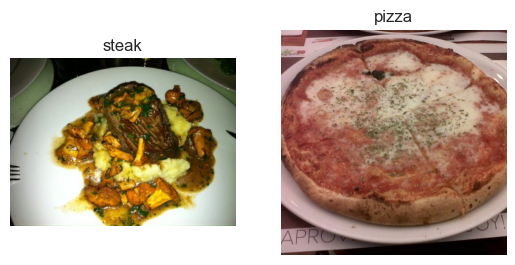

In [160]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image(target_dir="../../../Dataset/pizza_steak/train/",
                              target_class="steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image(target_dir="../../../Dataset/pizza_steak/train/",
                              target_class="pizza")

In [161]:
train_dir = "../../../Dataset/pizza_steak/train/"
test_dir = "../../../Dataset/pizza_steak/test/"



In [162]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [163]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

test_data = train_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [164]:
images, labels = train_data.next() # get the first batch of images and labels
len(images), len(labels)

(32, 32)

In [165]:
len(train_data)

47

In [166]:
1500/32

46.875

In [167]:
images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.31764707, 0.3254902 , 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34901962, 0.37254903],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.37647063],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.37254903, 0.39607847, 0.29411766],
          [0.39607847, 0.41960788, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.3019608 ],
          [0.30980393, 0.29803923, 0.27058825],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [168]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras.models import Sequential



In [169]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [170]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


In [171]:
model_4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_25 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_26 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_12 (Flatten)        (None, 475240)            0         
                                                                 
 dense_22 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [172]:
history_4 = model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 25s 534ms/step - loss: 0.6696 - accuracy: 0.6633 - val_loss: 0.4760 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 24s 515ms/step - loss: 0.4391 - accuracy: 0.7947 - val_loss: 0.4332 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 25s 541ms/step - loss: 0.3297 - accuracy: 0.8680 - val_loss: 0.3910 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 30s 635ms/step - loss: 0.1922 - accuracy: 0.9340 - val_loss: 0.4734 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 32s 681ms/step - loss: 0.0641 - accuracy: 0.9847 - val_loss: 0.4561 - val_accuracy: 0.8040


In [173]:
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [174]:
model_4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_25 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_26 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_12 (Flatten)        (None, 475240)            0         
                                                                 
 dense_22 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot: >

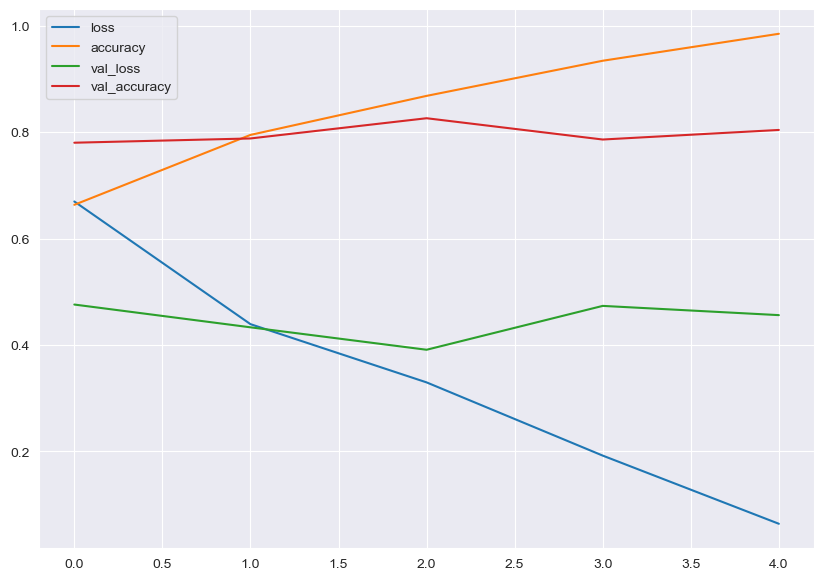

In [175]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [176]:
def plot_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()


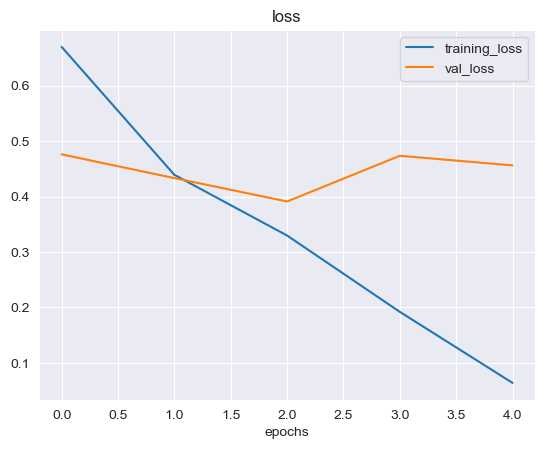

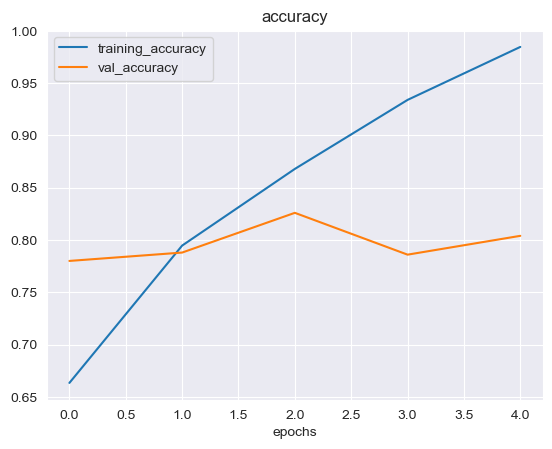

In [177]:
plot_loss(history_4)

In [178]:
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [179]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [180]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 265ms/step - loss: 0.5995 - accuracy: 0.6940 - val_loss: 0.4998 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 12s 252ms/step - loss: 0.4645 - accuracy: 0.7920 - val_loss: 0.3816 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 12s 250ms/step - loss: 0.4267 - accuracy: 0.8047 - val_loss: 0.3407 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 12s 244ms/step - loss: 0.3957 - accuracy: 0.8320 - val_loss: 0.3285 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 11s 242ms/step - loss: 0.3741 - accuracy: 0.8387 - val_loss: 0.3064 - val_accuracy: 0.8820


In [181]:
model_5.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 26, 26, 10)     

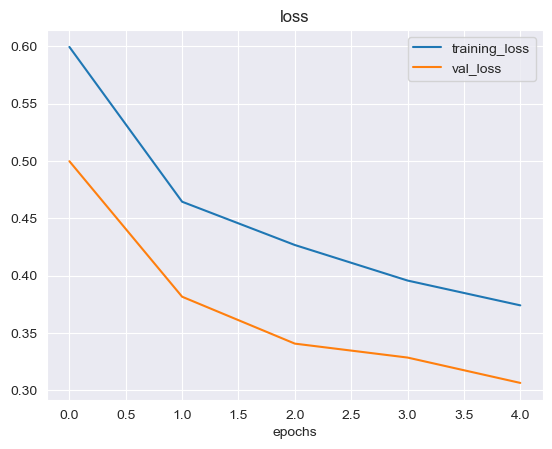

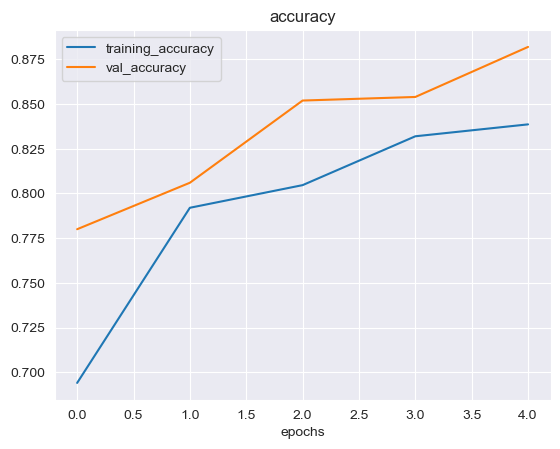

In [182]:
plot_loss(history_5)

In [183]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [184]:
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='binary',
                                                                  shuffle=False)
print('Non-augmented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)
print('Non-augmented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='binary')

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [185]:
images, labels = train_data.next()
images_augmented, labels_augmented = train_data_augmented.next()



showing image number: 26


(-0.5, 223.5, 223.5, -0.5)

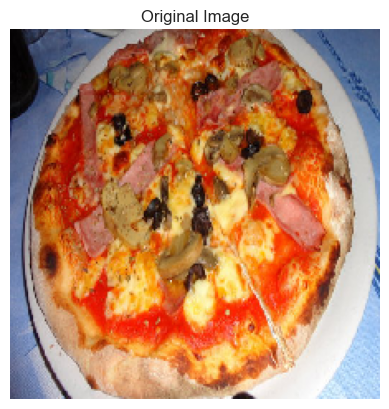

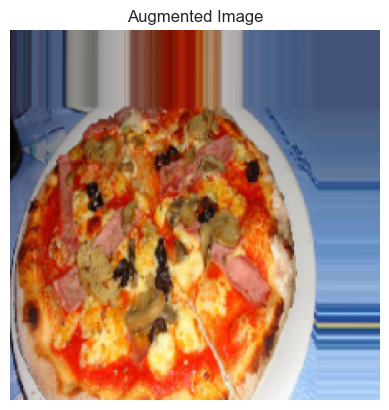

In [186]:
import random
random_number = random.randint(0, 31)
print(f'showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f'Original Image')
plt.axis(False)
plt.figure()
plt.imshow(images_augmented[random_number])
plt.title(f'Augmented Image')
plt.axis(False)


In [187]:
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 17s 366ms/step - loss: 0.7716 - accuracy: 0.4553 - val_loss: 0.6912 - val_accuracy: 0.5480
Epoch 2/5
47/47 [==============================] - 16s 331ms/step - loss: 0.6945 - accuracy: 0.4740 - val_loss: 0.6900 - val_accuracy: 0.5340
Epoch 3/5
47/47 [==============================] - 15s 327ms/step - loss: 0.7129 - accuracy: 0.4613 - val_loss: 0.6899 - val_accuracy: 0.5180
Epoch 4/5
47/47 [==============================] - 15s 313ms/step - loss: 0.7062 - accuracy: 0.4793 - val_loss: 0.6924 - val_accuracy: 0.5440
Epoch 5/5
47/47 [==============================] - 16s 333ms/step - loss: 0.6980 - accuracy: 0.5020 - val_loss: 0.6918 - val_accuracy: 0.5680


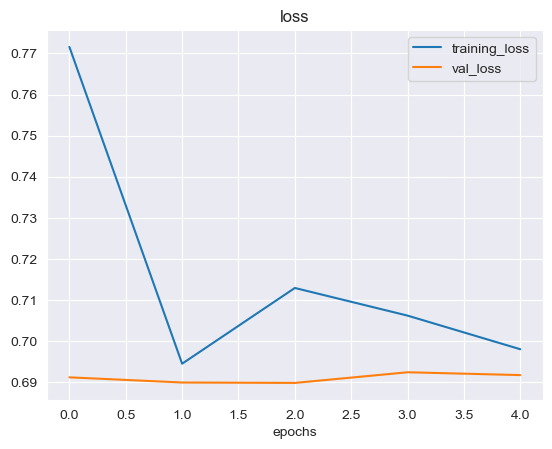

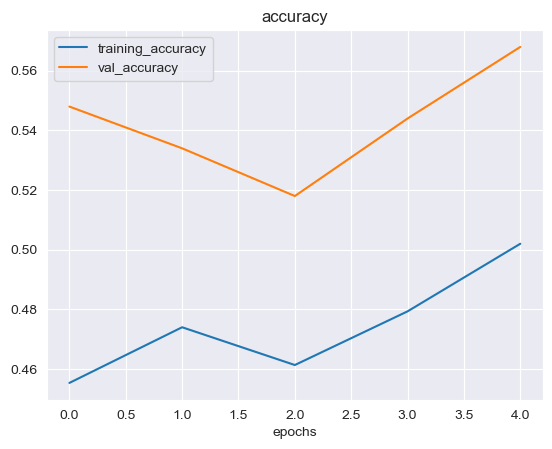

In [188]:
plot_loss(history_6)

In [189]:
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='binary',
                                                                  shuffle=True)
print('Non-augmented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True)
print('Non-augmented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='binary')

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [190]:
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 15s 318ms/step - loss: 0.6729 - accuracy: 0.5800 - val_loss: 0.5876 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 17s 350ms/step - loss: 0.5585 - accuracy: 0.7187 - val_loss: 0.4148 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 16s 339ms/step - loss: 0.5173 - accuracy: 0.7633 - val_loss: 0.4130 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 17s 366ms/step - loss: 0.5039 - accuracy: 0.7593 - val_loss: 0.3611 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 16s 341ms/step - loss: 0.4797 - accuracy: 0.7747 - val_loss: 0.3767 - val_accuracy: 0.8360


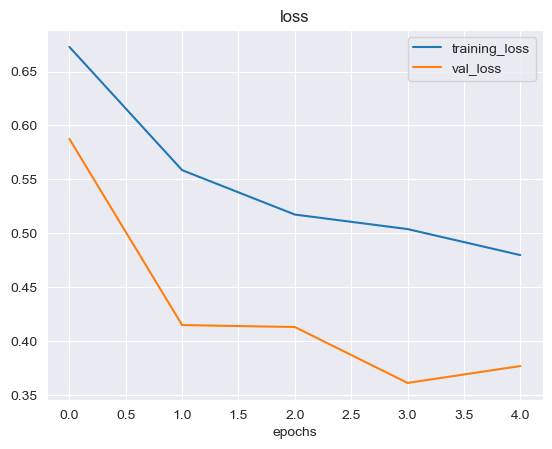

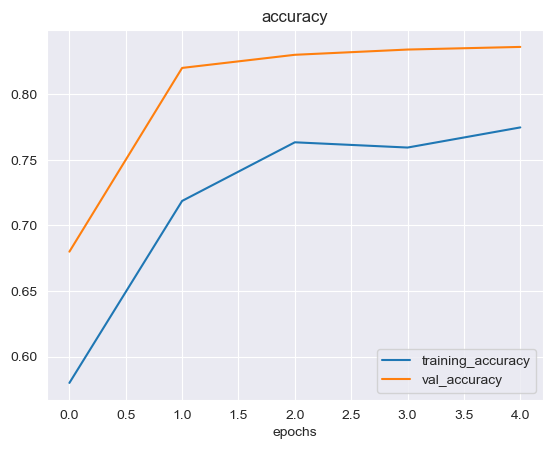

In [191]:
plot_loss(history_7)

In [192]:
class_names

array(['.DS_Store', 'pizza', 'steak'], dtype='<U9')

(-0.5, 3023.5, 4031.5, -0.5)

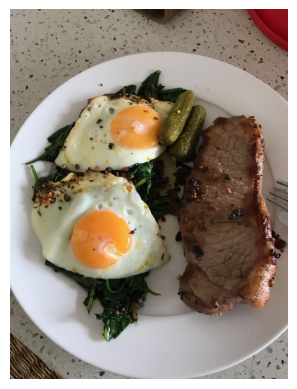

In [194]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [206]:
# Load image using mpimg.imread()
steak = mpimg.imread('03-steak.jpeg')
expanded_steak = np.expand_dims(steak, axis=0)

# Convert NumPy array to float32 data type
expanded_steak = expanded_steak.astype(np.float32)

# Decode and resize image using TensorFlow

expanded_steak = tf.image.resize(expanded_steak, size=[224, 224])
expanded_steak = tf.cast(expanded_steak, tf.float32) / 255.0



TypeError: Invalid shape (1, 224, 224, 3) for image data

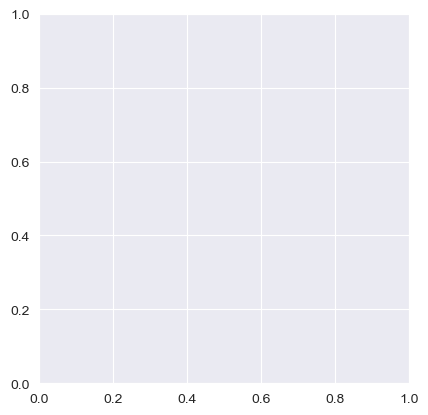

In [207]:
# Show the image using plt.imshow()
plt.imshow(expanded_steak)
plt.show()

In [202]:
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6406863 , 0.625     , 0.58186275],
        [0.65833336, 0.6308824 , 0.59166664],
        [0.6357843 , 0.6098039 , 0.56764704],
        ...,
        [0.5230392 , 0.05245098, 0.09166667],
        [0.5004902 , 0.04166667, 0.07696079],
        [0.53333336, 0.07696079, 0.1122549 ]],

       [[0.6632353 , 0.64754903, 0.6122549 ],
        [0.6387255 , 0.6230392 , 0.57990193],
        [0.6607843 , 0.62941176, 0.5862745 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.53186274, 0.06127451, 0.1004902 ],
        [0.5254902 , 0.05490196, 0.09411765]],

       [[0.65392154, 0.6382353 , 0.59117645],
        [0.64362746, 0.6122549 , 0.56911767],
        [0.65931374, 0.6279412 , 0.58480394],
        ...,
        [0.53382355, 0.06715687, 0.0877451 ],
        [0.53382355, 0.06617647, 0.10343137],
        [0.525     , 0.05441177, 0.09362745]],

       ...,

       [[0.49656862, 0.4254902 , 0.31715685],
        [0.05

In [203]:
model_7.predict(steak)

ValueError: in user code:

    File "/Users/kinhanglo/Desktop/machine-learning/Machine-Learning-environment/env/lib/python3.10/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/Users/kinhanglo/Desktop/machine-learning/Machine-Learning-environment/env/lib/python3.10/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/kinhanglo/Desktop/machine-learning/Machine-Learning-environment/env/lib/python3.10/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/kinhanglo/Desktop/machine-learning/Machine-Learning-environment/env/lib/python3.10/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/Users/kinhanglo/Desktop/machine-learning/Machine-Learning-environment/env/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/kinhanglo/Desktop/machine-learning/Machine-Learning-environment/env/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_15" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


In [238]:
def load_and_prep_image(filename, img_shape=224):
    """
    Reads in an image from filename, turns it into a tensor and reshapes into (224, 224, 3).
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [239]:
expanded_steak = load_and_prep_image('03-steak.jpeg')

In [240]:
pred = model_7.predict(tf.expand_dims(expanded_steak, axis=0))
pred

1/1 [==============================] - 0s 15ms/step


array([[0.8325958]], dtype=float32)

In [241]:
class_names

array(['.DS_Store', 'pizza', 'steak'], dtype='<U9')

In [242]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'pizza'

In [243]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with a model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)
    # Make a prediction using the model
    pred = model.predict(tf.expand_dims(img, axis=0))
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]
    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 17ms/step


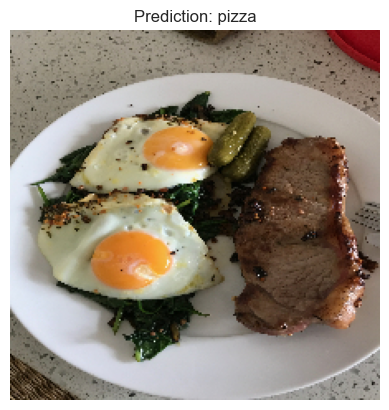

In [244]:
pred_and_plot(model_7, '03-steak.jpeg')

1/1 [==============================] - 0s 12ms/step


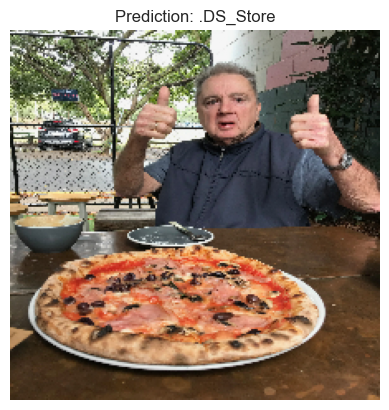

In [245]:
pred_and_plot(model_7, '03-pizza-dad.jpeg')

fail


In [277]:
import os
for dirpath, dirnames, filenames in os.walk('../../../Dataset/10_food_classes_all_data'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

There are 2 directories and 0 images in "../../../Dataset/10_food_classes_all_data".
There are 10 directories and 0 images in "../../../Dataset/10_food_classes_all_data/test".
There are 0 directories and 250 images in "../../../Dataset/10_food_classes_all_data/test/ice_cream".
There are 0 directories and 250 images in "../../../Dataset/10_food_classes_all_data/test/chicken_curry".
There are 0 directories and 250 images in "../../../Dataset/10_food_classes_all_data/test/steak".
There are 0 directories and 250 images in "../../../Dataset/10_food_classes_all_data/test/sushi".
There are 0 directories and 250 images in "../../../Dataset/10_food_classes_all_data/test/chicken_wings".
There are 0 directories and 250 images in "../../../Dataset/10_food_classes_all_data/test/grilled_salmon".
There are 0 directories and 250 images in "../../../Dataset/10_food_classes_all_data/test/hamburger".
There are 0 directories and 250 images in "../../../Dataset/10_food_classes_all_data/test/pizza".
There a

In [278]:
!ls -la ../../../Dataset/10_food_classes_all_data

total 0
drwxr-xr-x@  4 kinhanglo  staff  128 Dec 10  2020 .
drwxr-xr-x   6 kinhanglo  staff  192 Apr  7 14:22 ..
drwxr-xr-x@ 12 kinhanglo  staff  384 Dec 10  2020 test
drwxr-xr-x@ 12 kinhanglo  staff  384 Dec 10  2020 train


In [299]:
train_dir = '../../../Dataset/10_food_classes_all_data/train/'
test_dir = '../../../Dataset/10_food_classes_all_data/test/'



In [300]:
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3156598.jpg']
Image shape: (512, 512, 3)


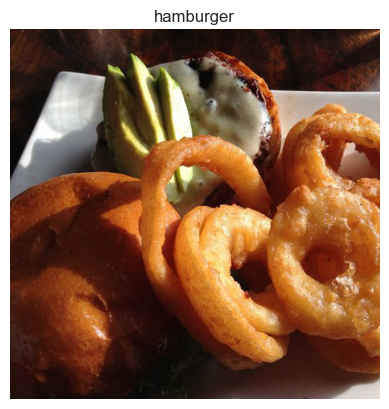

In [303]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [304]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')




Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [305]:
model_8 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2, padding='valid'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_8.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 41s 174ms/step - loss: 2.1638 - accuracy: 0.2081 - val_loss: 1.9664 - val_accuracy: 0.3052
Epoch 2/5
235/235 [==============================] - 43s 182ms/step - loss: 1.9051 - accuracy: 0.3409 - val_loss: 1.8947 - val_accuracy: 0.3324
Epoch 3/5
235/235 [==============================] - 44s 186ms/step - loss: 1.7331 - accuracy: 0.4088 - val_loss: 1.8952 - val_accuracy: 0.3268
Epoch 4/5
235/235 [==============================] - 46s 197ms/step - loss: 1.5433 - accuracy: 0.4817 - val_loss: 1.8967 - val_accuracy: 0.3412
Epoch 5/5
235/235 [==============================] - 50s 212ms/step - loss: 1.3131 - accuracy: 0.5667 - val_loss: 2.0481 - val_accuracy: 0.3320


In [306]:
model_8.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 2.0481 - accuracy: 0.3320


[2.048086404800415, 0.3319999873638153]

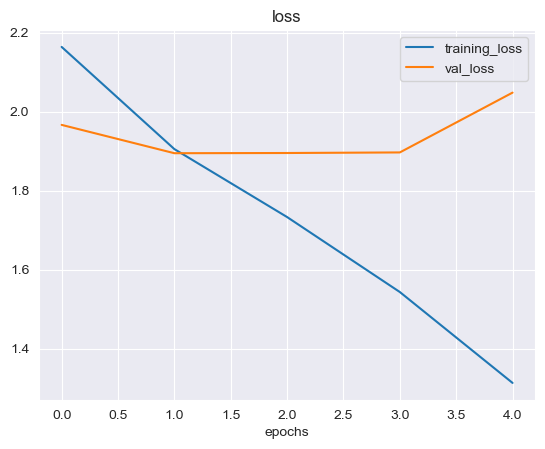

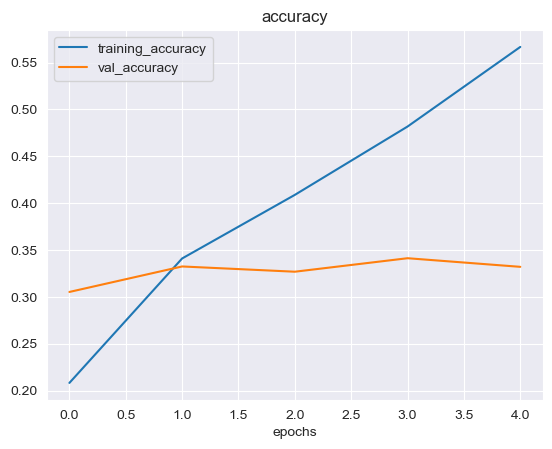

In [307]:
plot_loss(history_8)

In [308]:
model_8.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 26, 26, 10)     

In [309]:
model_9 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 40s 170ms/step - loss: 2.1035 - accuracy: 0.2565 - val_loss: 1.9350 - val_accuracy: 0.3224
Epoch 2/5
235/235 [==============================] - 40s 171ms/step - loss: 1.7138 - accuracy: 0.4237 - val_loss: 1.9177 - val_accuracy: 0.3420
Epoch 3/5
235/235 [==============================] - 42s 178ms/step - loss: 1.2477 - accuracy: 0.5923 - val_loss: 2.0649 - val_accuracy: 0.3228
Epoch 4/5
235/235 [==============================] - 42s 179ms/step - loss: 0.7136 - accuracy: 0.7853 - val_loss: 2.4305 - val_accuracy: 0.2892
Epoch 5/5
235/235 [==============================] - 43s 182ms/step - loss: 0.3231 - accuracy: 0.9168 - val_loss: 2.9181 - val_accuracy: 0.3036


In [310]:
model_9.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 29160)             0         
                                                                 
 dense_27 (Dense)            (None, 10)              

In [311]:
model_9.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 2.9181 - accuracy: 0.3036


[2.9180946350097656, 0.303600013256073]

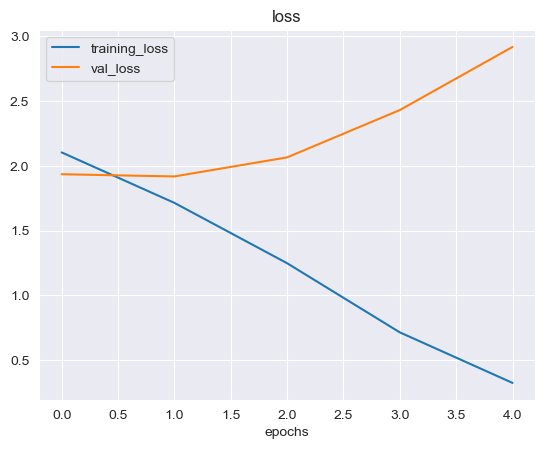

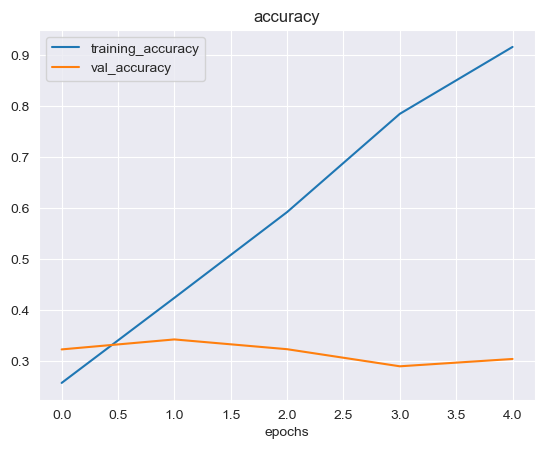

In [312]:
plot_loss(history_9)

In [313]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                        class_mode='categorical',
                                                                   seed=42)

Found 7500 images belonging to 10 classes.


In [314]:
model_10 = tf.keras.models.clone_model(model_8)
model_10.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))



Epoch 1/5
235/235 [==============================] - 67s 286ms/step - loss: 2.1904 - accuracy: 0.1871 - val_loss: 2.0192 - val_accuracy: 0.2672
Epoch 2/5
235/235 [==============================] - 67s 286ms/step - loss: 2.0625 - accuracy: 0.2700 - val_loss: 1.9983 - val_accuracy: 0.2800
Epoch 3/5
235/235 [==============================] - 68s 289ms/step - loss: 2.0033 - accuracy: 0.2960 - val_loss: 1.8655 - val_accuracy: 0.3464
Epoch 4/5
235/235 [==============================] - 71s 302ms/step - loss: 1.9636 - accuracy: 0.3157 - val_loss: 1.8204 - val_accuracy: 0.3760
Epoch 5/5
235/235 [==============================] - 67s 284ms/step - loss: 1.9382 - accuracy: 0.3269 - val_loss: 1.7843 - val_accuracy: 0.3956


In [315]:
model_10.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 26, 26, 10)     

In [316]:
model_8.evaluate(test_data)


79/79 [==============================] - 7s 84ms/step - loss: 2.0481 - accuracy: 0.3320


[2.048086404800415, 0.3319999873638153]

In [317]:
model_10.evaluate(test_data)

79/79 [==============================] - 7s 86ms/step - loss: 1.7843 - accuracy: 0.3956


[1.7842702865600586, 0.39559999108314514]

In [319]:
pred_and_plot(model =model_10,
              filename='03-steak.jpeg',
              class_names=class_names)

1/1 [==============================] - 0s 28ms/step


TypeError: only size-1 arrays can be converted to Python scalars

In [325]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with a model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)
    # Make a prediction using the model
    pred = model.predict(tf.expand_dims(img, axis=0))

    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 13ms/step


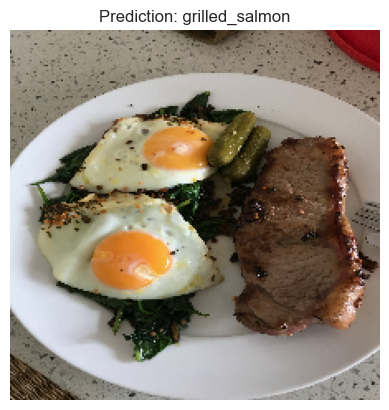

In [326]:
pred_and_plot(model =model_10,
              filename='03-steak.jpeg',
              class_names=class_names)

In [327]:
model_10.save('saved_model_10')

INFO:tensorflow:Assets written to: saved_model_10/assets


INFO:tensorflow:Assets written to: saved_model_10/assets


In [330]:
loaded_model_10 = tf.keras.models.load_model('saved_model_10')
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 1.7843 - accuracy: 0.3956


[1.78426992893219, 0.39559999108314514]

In [331]:
model_10.evaluate(test_data)

79/79 [==============================] - 6s 77ms/step - loss: 1.7843 - accuracy: 0.3956


[1.784270167350769, 0.39559999108314514]